## Ideas

- Cantidad de publicaciones de cada tipo
  - En total
  - Por año
- 

In [2]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'mes', 'ano', 'dia',
       'precio_metro_cubierto', 'precio_metro_total', 'gps'],
      dtype='object')

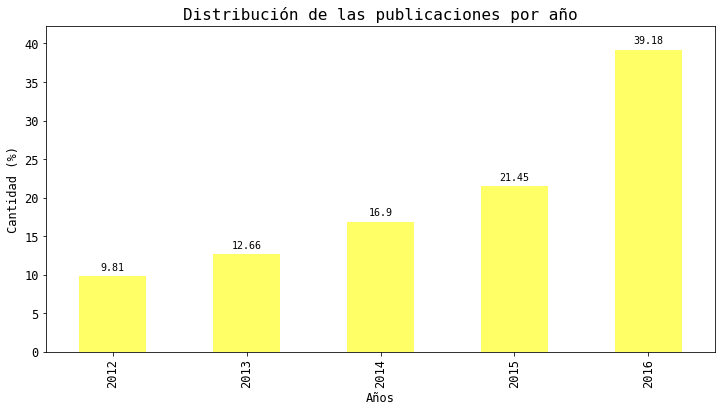

In [6]:
#Distribucion de las publicaciones por año
por_anio = df.groupby("ano").agg({"ano":"count"}).rename(columns={'ano':'cantidad'})
total_publicaciones = df.shape[0]
por_anio_porcentual = por_anio.apply(lambda x: round(100 * x/total_publicaciones, 2), axis=0)
#histograma de ditribucion por año
get_barplot(por_anio_porcentual.cantidad, title="Distribución de las publicaciones por año", x_label="Años", y_label="Cantidad (%)")

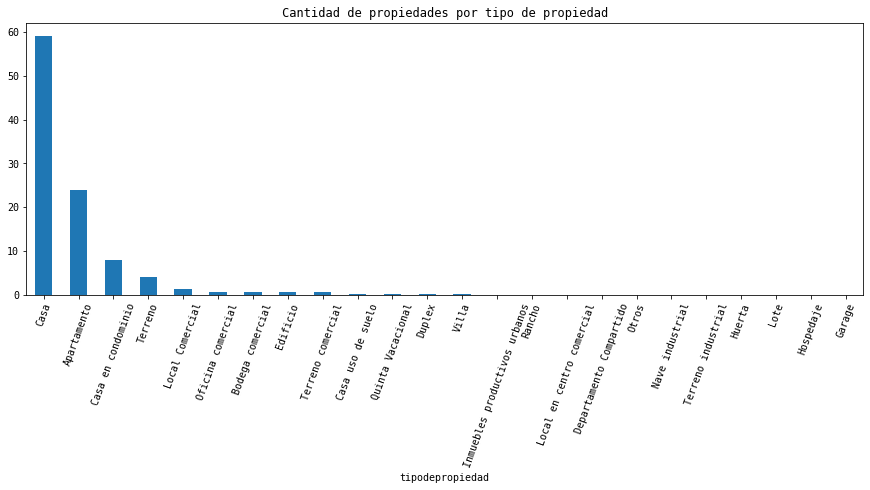

In [8]:
por_tipo = df.groupby(["tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0).sort_values(ascending=False)
por_tipo.index = por_tipo.index.droplevel()
total_publicaciones = por_tipo.sum()
por_tipo_porcentual = por_tipo.apply(lambda x: round(100 * x/total_publicaciones, 2))
por_tipo_porcentual
por_tipo_porcentual.plot(kind='bar', figsize=(15, 5), rot=70, 
                                       title="Cantidad de propiedades por tipo de propiedad");

In [11]:
por_tipo_porcentual.head(5).sum()

96.41

En base a los resultados de la tabla anterior, nos quedamos con los 5 tipos de propiedad más frecuentes en las publicaciones (96.41% del total) para poder sintetizar mejor los gráficos.

In [12]:
top_5_tipos  = por_tipo_porcentual.head(5).index.values

In [13]:
df_top_5 = df.loc[df["tipodepropiedad"].isin(top_5_tipos)]

In [14]:
por_tipo_ano = df_top_5.groupby(["ano","tipodepropiedad"]).agg({"tipodepropiedad":"count"}).unstack(fill_value=0)
por_tipo_ano.columns = por_tipo_ano.columns.droplevel()

In [15]:
totales = por_tipo_ano.sum(axis=1)

In [16]:
# por_tipo_porcentual = por_tipo.apply(lambda x: x[totales], axis=1)
por_tipo_ano_porcentual = por_tipo_ano.apply(lambda x: round(100 * x/totales[x.index], 2), axis=0)

In [17]:
por_tipo_ano_porcentual

tipodepropiedad,Apartamento,Casa,Casa en condominio,Local Comercial,Terreno
ano,,,,,
2012,22.35,60.49,12.49,0.48,4.19
2013,22.78,65.70,6.65,1.11,3.76
2014,24.80,62.14,7.78,1.34,3.94
2015,25.80,60.17,8.27,1.45,4.31
2016,25.48,60.21,8.13,1.52,4.65


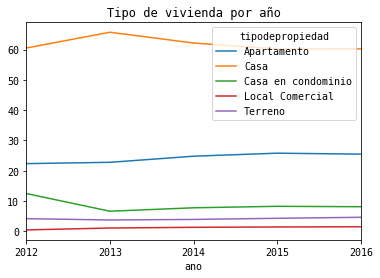

In [19]:
por_tipo_ano_porcentual.plot(kind='line', xticks=por_tipo_ano_porcentual.index.values, title= "Tipo de vivienda por año")

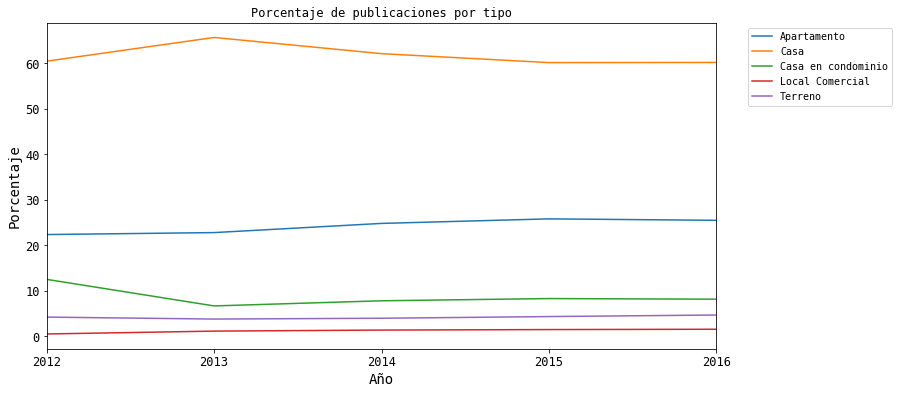

In [197]:
import matplotlib.pyplot as plt
def get_lineplot(data, xlabel="", ylabel="", **kwargs):
    plot = data.plot(figsize=(12,6), fontsize=12, **kwargs)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    return plot
plot = get_lineplot(por_tipo_ano_porcentual, xticks=por_tipo_ano_porcentual.index.values, title = "Porcentaje de publicaciones por tipo", xlabel="Año", ylabel="Porcentaje")


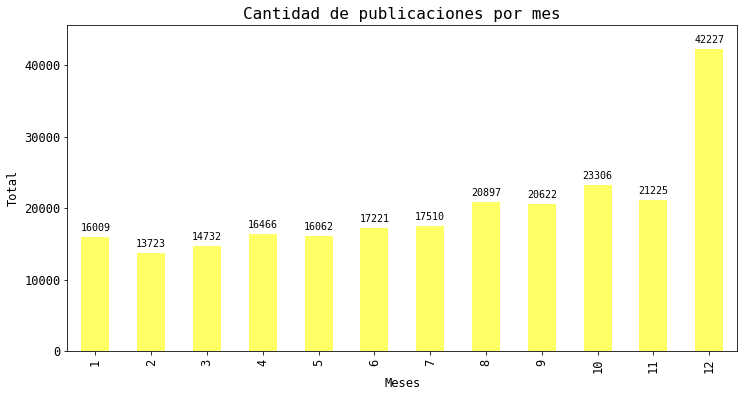

In [29]:
meses = df.groupby(['mes']).agg({"id":"count"})
meses=meses.rename(columns={"id":"total"})
get_barplot(meses["total"], title="Cantidad de publicaciones por mes", x_label="Meses", y_label="Total",)